In [11]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [8]:
class FisherLinearDiscriminant:
    def fit(self,X,y):
        
        self.X=X
        self.y=y
        self.N, self.D=self.X.shape
        
        #calculate class mean
        X0=X[y==0]
        X1=X[y==1]
        mu0=X0.mean(0)
        mu1=X1.mean(0)
        
        #sigma_w
        sigma_w=np.empty((self.D,self.D))
        for x0 in X0:
            x0_minus_mu0=(x0-mu0).reshape(-1,1)
            sigma_w += np.dot(x0_minus_mu0,x0_minus_mu0.T )
        for x1 in X1:
            x1_minus_mu1=(x1-mu1).reshape(-1,1)
            sigma_w += np.dot(x1_minus_mu1,x1_minus_mu1.T )
        sigma_w_inverse=np.linalg.inv(sigma_w)
        ## Beta
        self.beta = np.dot(sigma_w_inverse, mu1 - mu0)
        self.f = np.dot(X, self.beta)
        
        

In [9]:
model=FisherLinearDiscriminant()
model.fit(X,y);

/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


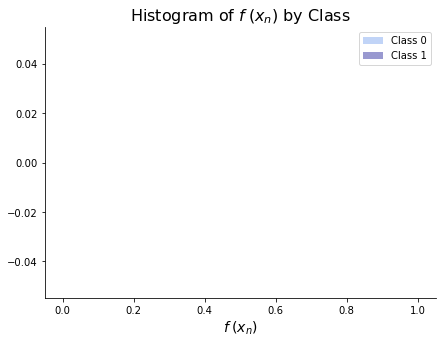

In [10]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(model.f[model.y == 0], bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(model.f[model.y == 1], bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()

In [17]:
#using sklearn library
# import data
cancer = datasets.load_breast_cancer()
X = cancer['data']
y = cancer['target']

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=1)
lda.fit(X,y)

f0=np.dot(X,lda.coef_[0])[y==0]
f1=np.dot(X,lda.coef_[0])[y==1]
print('Separated:', (min(f0) > max(f1)) | (max(f0) < min(f1)))


Separated: False


/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


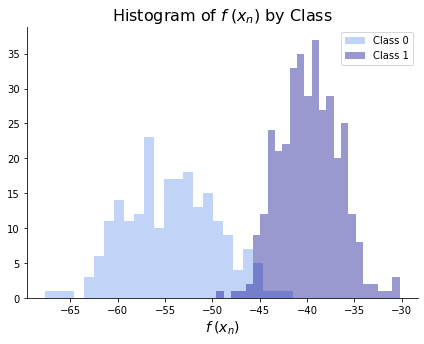

In [18]:
fig, ax = plt.subplots(figsize = (7,5))
sns.distplot(f0, bins = 25, kde = False, 
             color = 'cornflowerblue', label = 'Class 0')
sns.distplot(f1, bins = 25, kde = False, 
             color = 'darkblue', label = 'Class 1')
ax.set_xlabel(r"$f\hspace{.25}(x_n)$", size = 14)
ax.set_title(r"Histogram of $f\hspace{.25}(x_n)$ by Class", size = 16)
ax.legend()
sns.despine()